In [2]:
from cv2 import *
import imutils
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import compare_ssim

### Localizando imagens do símbolo diamante na figura 1:

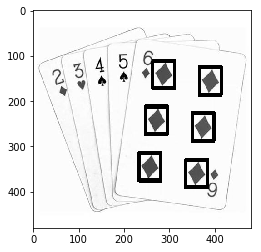

In [3]:
img1 = cv2.imread('1.jpg',0)

diamante = cv2.imread('diamond.jpg',0)
w,h = diamante.shape[::-1]

res1 = cv2.matchTemplate(img1,diamante,cv2.TM_CCOEFF_NORMED)

threshold = 0.8
loc = np.where( res1 >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img1, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

plt.figure()
plt.imshow(img1,cmap = 'gray')

### Localizando imagens do símbolo espadas na figura 2:

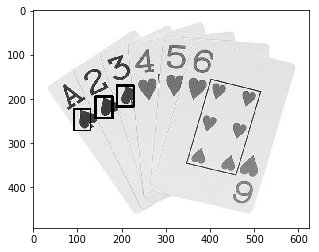

In [4]:
img2 = cv2.imread('2.jpg',0)

espadas = cv2.imread('espadas.png',0)
w,h = espadas.shape[::-1]

res2 = cv2.matchTemplate(img2,espadas,cv2.TM_CCOEFF_NORMED)

threshold2 = 0.75
loc2 = np.where( res2 >= threshold2)

for pt in zip(*loc2[::-1]):
    cv2.rectangle(img2, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

plt.figure()
plt.imshow(img2,cmap = 'gray')

### Localizando letra A (Ás) na figura 3:

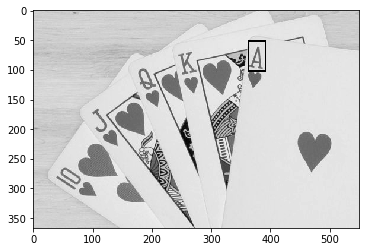

In [5]:
img3 = cv2.imread('3.jpg',0)

ace = cv2.imread('ace.png',0)
w,h = ace.shape[::-1]

res3 = cv2.matchTemplate(img3,ace,cv2.TM_CCOEFF_NORMED)

threshold3 = 0.8
loc3 = np.where( res3 >= threshold3)

for pt in zip(*loc3[::-1]):
    cv2.rectangle(img3, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)

plt.figure()
plt.imshow(img3,cmap = 'gray')

### Calculando índice de similaridade estrutural para as figuras 2 e 3:

In [6]:
img4 = cv2.imread('2.jpg')
img5 = cv2.imread('3.jpg')

gray4 = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
gray5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

w,h = gray5.shape[::-1]

dim = (w,h)
gray4 = cv2.resize(gray4,dim, interpolation = cv2.INTER_AREA)

(score, diff) = compare_ssim(gray4, gray5, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.6076980489620316


In [7]:
thresh = cv2.threshold(diff, 0, 255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

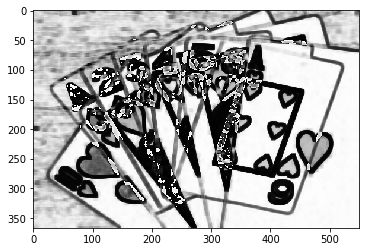

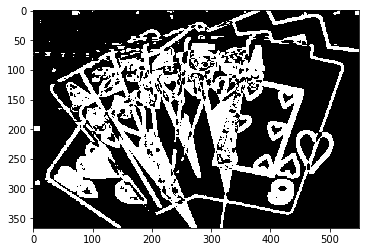

In [8]:
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(img4, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(img5, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
plt.figure()
plt.imshow(diff,cmap = 'gray')

plt.figure()
plt.imshow(thresh,cmap = 'gray')

### Localizando número 7 na figura 4:

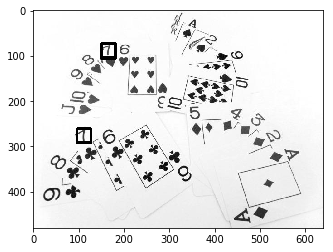

In [9]:
img7 = cv2.imread('4.jpg', cv2.IMREAD_GRAYSCALE)
sete = cv2.imread('sete.png', cv2.IMREAD_GRAYSCALE)

w,h = sete.shape[::-1]

res7 = cv2.matchTemplate(img7,sete,cv2.TM_CCOEFF_NORMED)

threshold7 = 0.65
loc7 = np.where( res7 >= threshold7)

for pt in zip(*loc7[::-1]):
    cv2.rectangle(img7, pt, (pt[0] + w, pt[1] + h), (0,0,0), 3)

plt.figure()
plt.imshow(img7, cmap = 'gray')

### Identificando a cor azul na figura 5:

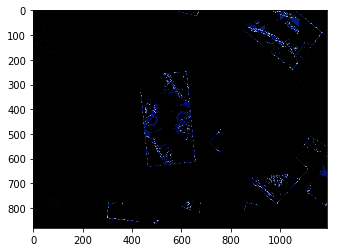

In [10]:
img7 = cv2.imread('5.jpg')

hsv = cv2.cvtColor(img7, cv2.COLOR_BGR2HSV) 

low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])

blue_mask = cv2.inRange(hsv, low_blue, high_blue)
blue = cv2.bitwise_and(img7, img7, mask=blue_mask)

blue =  cv2.cvtColor(blue, cv2.COLOR_BGR2RGB)

plt.figure()
plt.imshow(blue) 